# 1 Region and Domain

## State the region and the domain category that your data sets are about.

Ann Arbor, Michigan, United States
Religious events or traditions

# 2 Research Question
## You must state a question about the domain category and region that you identified as being interesting.
The date of Easter varies year to year.  What is the variation in maximum and minimum temperature that has taken place in the years XXXX and XXXX?  Is there a noticible difference in temparature for Easters that have taken place earlier in the year compared with later in the year?

# 3 Links
## You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
http://tlarsen2.tripod.com/thomaslarsen/easterdates.html 
https://www.ncdc.noaa.gov  
Data request at ncdc.noaa.gov was the following parameters:  
REQUESTED DATA REVIEW  
Dataset	Daily Summaries  
Order Start Date	2000-01-01 00:00  
Order End Date	2015-08-01 23:59  
Output Format	Custom GHCN-Daily CSV  
Data Types	TAVG, TMAX, TMIN, TOBS  
Custom Flag(s)	Station Name  
Units	Standard  
Stations/Locations	Ann Arbor, MI US (Location ID: CITY:US260002)


# 4 Image
## You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# bring in data
temps = pd.read_csv('1444729.csv')
easter_dates = pd.read_fwf('easter_dates_2000.txt', [(0, 15)], header=None)
# convert date strings to datetime format
easter_dates['date'] = easter_dates[0].map(lambda x: pd.to_datetime(x))
temps['date_dt'] = temps['DATE'].map(lambda x: pd.to_datetime(x))
# limit temp datset to Easter only
temps = temps[temps['date_dt'].isin(easter_dates['date'])]
temps['month_day'] = (temps['date_dt'].map(lambda x: x.month) * 100) + temps['date_dt'].map(lambda x: x.day)
# maxmin
extrem_temp = pd.DataFrame([], columns=['min', 'max'])
extrem_temp['max'] = temps.groupby('month_day')['TMAX'].max()
extrem_temp['min'] = temps.groupby('month_day')['TMIN'].min()
extrem_temp.reset_index(inplace=True)

# full range of easter days
easter_range = pd.DataFrame(np.append(np.arange(323,331) , np.arange(401, 424)), columns=['month_day'])
extrem_temp = pd.merge(extrem_temp, easter_range, on='month_day', how='outer').sort_values('month_day')
extrem_temp['month_day'] = extrem_temp['month_day'].map(lambda x: np.str(x))

<IPython.core.display.Javascript object>


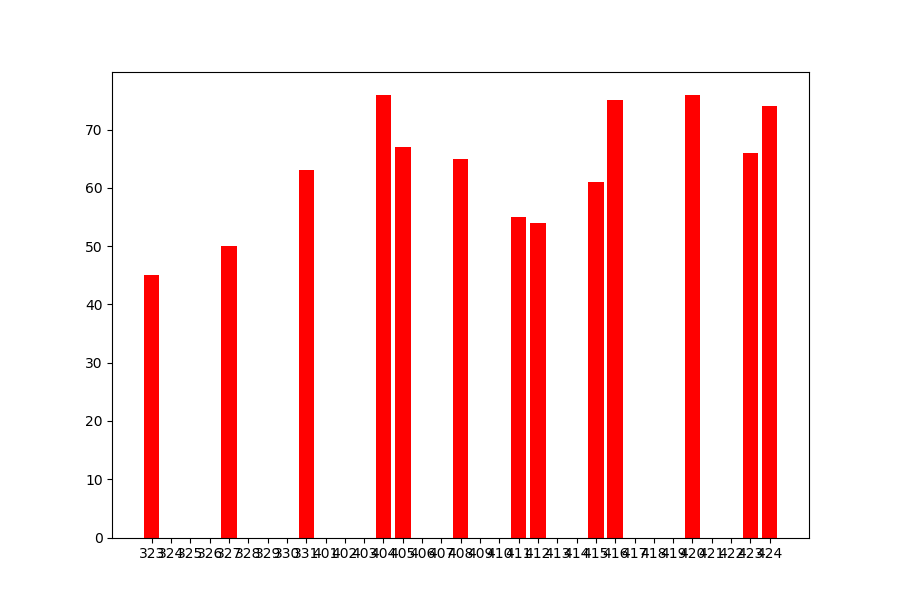

<BarContainer object of 33 artists>

In [52]:
plt.figure()
sns.factorplot(x='month_day', y)
plt.bar(extrem_temp['month_day'], extrem_temp['min'], color='blue' )
plt.bar(extrem_temp['month_day'], extrem_temp['max'], color='red' )




In [7]:
extrem_temp.head()

,month_day,min,max
0,323,9.0,45.0
13,324,NaN,NaN
14,325,NaN,NaN
15,326,NaN,NaN
1,327,21.0,50.0


# 5 Discussion
## You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

<IPython.core.display.Javascript object>


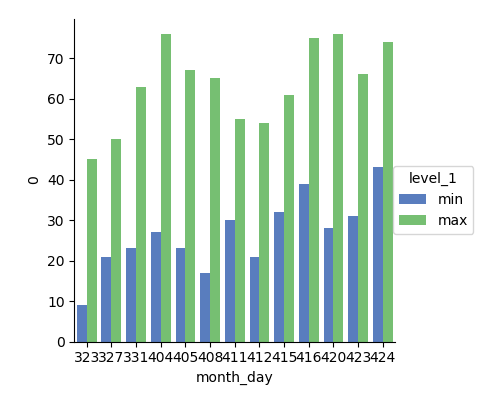

In [21]:
g = extrem_temp.set_index('month_day').stack().reset_index()
#table = df.pivot(index='Country',columns='Year',values='Value')  

plotty = sns.factorplot(x="month_day", y=0, hue='level_1', data=g, kind="bar", palette="muted")
#g.head()

In [22]:
type(plotty)

seaborn.axisgrid.FacetGrid

In [51]:
type(temps['DATE'][0])

str

In [54]:
temps2.shape

(129, 8)

In [55]:
temps2.head(10)

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS,date_dt
113,USC00200230,"ANN ARBOR U OF MICH, MI US",2000-04-23,NaN,65.0,37.0,62.0,2000-04-23
470,USC00200230,"ANN ARBOR U OF MICH, MI US",2001-04-15,NaN,61.0,38.0,42.0,2001-04-15
820,USC00200230,"ANN ARBOR U OF MICH, MI US",2002-03-31,NaN,54.0,33.0,49.0,2002-03-31
1205,USC00200230,"ANN ARBOR U OF MICH, MI US",2003-04-20,NaN,73.0,56.0,60.0,2003-04-20
1562,USC00200230,"ANN ARBOR U OF MICH, MI US",2004-04-11,NaN,49.0,34.0,45.0,2004-04-11
1912,USC00200230,"ANN ARBOR U OF MICH, MI US",2005-03-27,NaN,48.0,30.0,45.0,2005-03-27
2297,USC00200230,"ANN ARBOR U OF MICH, MI US",2006-04-16,NaN,68.0,41.0,56.0,2006-04-16
2654,USC00200230,"ANN ARBOR U OF MICH, MI US",2007-04-08,NaN,34.0,23.0,33.0,2007-04-08
3004,USC00200230,"ANN ARBOR U OF MICH, MI US",2008-03-23,NaN,41.0,20.0,37.0,2008-03-23
3389,USC00200230,"ANN ARBOR U OF MICH, MI US",2009-04-12,NaN,53.0,27.0,50.0,2009-04-12


In [3]:
goulet = pd.DataFrame([], columns=['one', 'two'])

<BarContainer object of 2 artists>

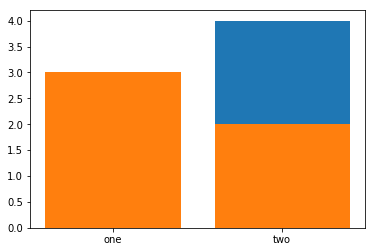

In [6]:
goulet['one'] = [2,4]
goulet['two'] = [3,2]
plt.figure()
plt.bar(goulet.columns, goulet['one'])
plt.bar(goulet.columns, goulet['two'])